# Credit Risk Prediction using Machine Learning
A complete end-to-end ML project

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60787
           1       0.33      0.14      0.20        84

    accuracy                           1.00     60871
   macro avg       0.67      0.57      0.60     60871
weighted avg       1.00      1.00      1.00     60871


🧮 Confusion Matrix:
[[60763    24]
 [   72    12]]

🎯 ROC AUC Score: 0.7664


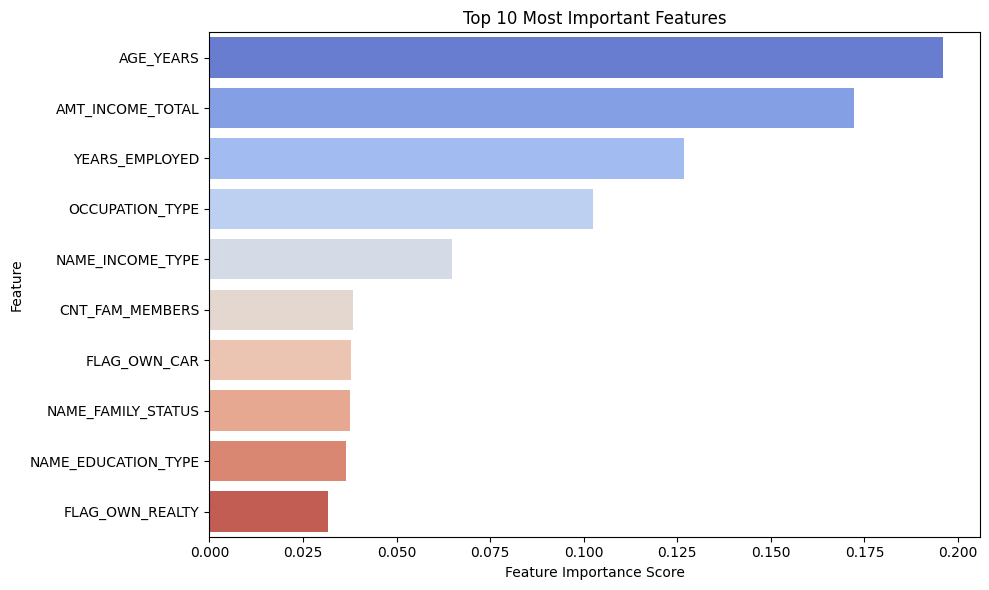

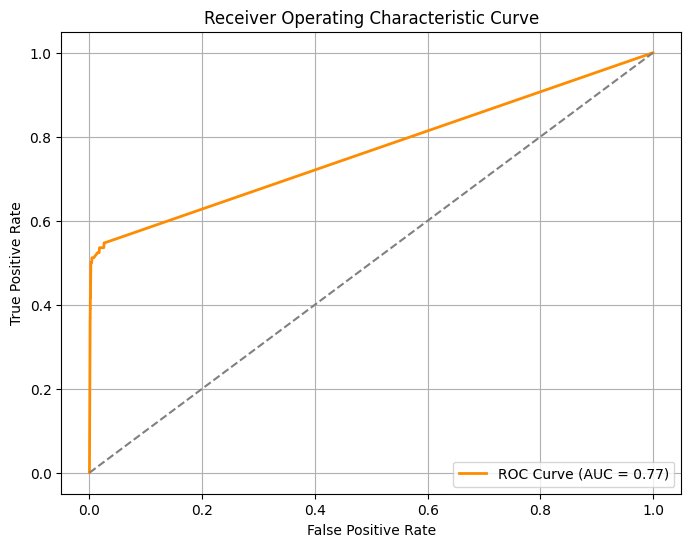

In [1]:

# Credit Risk Prediction using Machine Learning

## 1. Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## 2. Load the Datasets
application_df = pd.read_csv("application_record.csv")
credit_df = pd.read_csv("credit_record.csv")

## 3. Create the Target Column
bad_status = ['2', '3', '4', '5']
bad_clients = credit_df[credit_df['STATUS'].isin(bad_status)]
bad_ids = set(bad_clients['ID'])

application_df['TARGET'] = application_df['ID'].apply(lambda x: 1 if x in bad_ids else 0)

## 4. Preprocessing
df = application_df.dropna().copy()

# Convert days to years
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) // 365
df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED']) // 365
df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features and target
X = df.drop(columns=['ID', 'TARGET'])
y = df['TARGET']

## 5. Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 6. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

## 8. Predictions and Evaluation
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_proba)
print(f"\n🎯 ROC AUC Score: {auc_score:.4f}")

## 9. Feature Importance Plot
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="coolwarm")
plt.title("Top 10 Most Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 10. ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
